## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [5]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [6]:
from keras.datasets import cifar10
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
from keras.utils import np_utils
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

# 比較val_loss 和 val_acc為設置下的差異

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [13]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
import tensorflow as tf
from keras.callbacks import EarlyStopping

earlystop_acc = EarlyStopping(monitor="val_acc", 
                          patience=5, 
                          verbose=1
                          )

earlystop_loss = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )
EARLYSTOP = [earlystop_acc, earlystop_loss]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i=0
for stopper in EARLYSTOP:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[stopper]
             )
    
    if i == 0:
        stopper_name = 'val_acc'
    else:
        stopper_name = 'val_loss'
    
    # Collect results
    name_tag = 'stopper = %s'%str(stopper_name)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    i+=1

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 hidden_layer3 (Dense)       (None, 128)               3289

49/49 [==============================] - 4s 89ms/step - loss: 1.1049 - accuracy: 0.6231 - val_loss: 1.4601 - val_accuracy: 0.4910
Epoch 19/50
49/49 [==============================] - 4s 88ms/step - loss: 1.0813 - accuracy: 0.6319 - val_loss: 1.4661 - val_accuracy: 0.4906
Epoch 20/50
49/49 [==============================] - 4s 90ms/step - loss: 1.0592 - accuracy: 0.6404 - val_loss: 1.4584 - val_accuracy: 0.4897
Epoch 21/50
49/49 [==============================] - 5s 96ms/step - loss: 1.0373 - accuracy: 0.6477 - val_loss: 1.4579 - val_accuracy: 0.4917
Epoch 22/50
49/49 [==============================] - 5s 93ms/step - loss: 1.0158 - accuracy: 0.6561 - val_loss: 1.4725 - val_accuracy: 0.4942
Epoch 23/50
49/49 [==============================] - 4s 90ms/step - loss: 0.9946 - accuracy: 0.6642 - val_loss: 1.4634 - val_accuracy: 0.4967
Epoch 24/50
49/49 [==============================] - 5s 101ms/step - loss: 0.9748 - accuracy: 0.6721 - val_loss: 1.4794 - val_accuracy: 0.4861
Epoch 25/50
49/49

49/49 [==============================] - 5s 97ms/step - loss: 0.6599 - accuracy: 0.7949 - val_loss: 1.5603 - val_accuracy: 0.4949
Epoch 41/50
49/49 [==============================] - 5s 97ms/step - loss: 0.6435 - accuracy: 0.8009 - val_loss: 1.5868 - val_accuracy: 0.4947
Epoch 42/50
49/49 [==============================] - 5s 95ms/step - loss: 0.6257 - accuracy: 0.8070 - val_loss: 1.5826 - val_accuracy: 0.4933
Epoch 43/50
49/49 [==============================] - 5s 95ms/step - loss: 0.6080 - accuracy: 0.8157 - val_loss: 1.5967 - val_accuracy: 0.4959
Epoch 44/50
49/49 [==============================] - 5s 98ms/step - loss: 0.5895 - accuracy: 0.8244 - val_loss: 1.6207 - val_accuracy: 0.4864
Epoch 45/50
49/49 [==============================] - 5s 96ms/step - loss: 0.5730 - accuracy: 0.8299 - val_loss: 1.6095 - val_accuracy: 0.4907
Epoch 46/50
49/49 [==============================] - 5s 101ms/step - loss: 0.5557 - accuracy: 0.8374 - val_loss: 1.6279 - val_accuracy: 0.4824
Epoch 47/50
49/49

49/49 [==============================] - 5s 106ms/step - loss: 1.0975 - accuracy: 0.6255 - val_loss: 1.4675 - val_accuracy: 0.4849
Epoch 20/50
49/49 [==============================] - 5s 99ms/step - loss: 1.0739 - accuracy: 0.6344 - val_loss: 1.4639 - val_accuracy: 0.4858
Epoch 21/50
49/49 [==============================] - 5s 101ms/step - loss: 1.0518 - accuracy: 0.6428 - val_loss: 1.4687 - val_accuracy: 0.4873
Epoch 22/50
49/49 [==============================] - 5s 103ms/step - loss: 1.0314 - accuracy: 0.6502 - val_loss: 1.4741 - val_accuracy: 0.4809
Epoch 23/50
49/49 [==============================] - 5s 105ms/step - loss: 1.0096 - accuracy: 0.6572 - val_loss: 1.4627 - val_accuracy: 0.4929
Epoch 23: early stopping


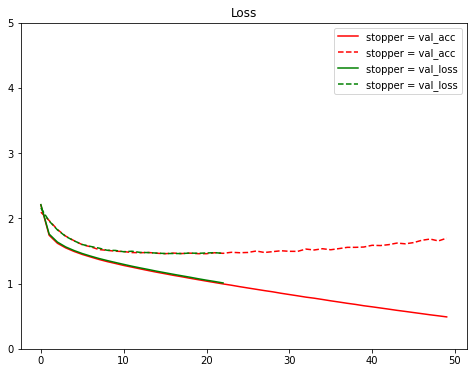

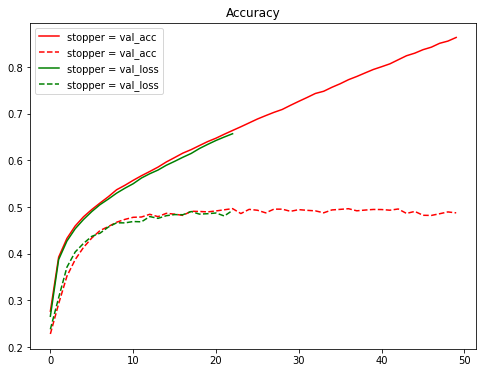

In [14]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 調整 earlystop 的等待次數至 10, 25 並比較結果

In [18]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
import tensorflow as tf
from keras.callbacks import EarlyStopping

earlystop_10 = EarlyStopping(monitor="val_loss", 
                          patience=10, 
                          verbose=1
                          )

earlystop_25 = EarlyStopping(monitor="val_loss", 
                          patience=25, 
                          verbose=1
                          )
EARLYSTOP = [earlystop_10, earlystop_25]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i=0
for stopper in EARLYSTOP:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[stopper]
             )
    
    if i == 0:
        stopper_name = 'stop at 10'
    else:
        stopper_name = 'stop at 25'
    
    # Collect results
    name_tag = 'stopper = %s'%str(stopper_name)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    results[name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    i+=1

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization_18 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_19 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 hidden_layer3 (Dense)       (None, 128)               3289

Epoch 2/50
49/49 [==============================] - 5s 96ms/step - loss: 1.7510 - accuracy: 0.3924 - val_loss: 1.9773 - val_accuracy: 0.2845
Epoch 3/50
49/49 [==============================] - 5s 95ms/step - loss: 1.6294 - accuracy: 0.4322 - val_loss: 1.8473 - val_accuracy: 0.3482
Epoch 4/50
49/49 [==============================] - 5s 95ms/step - loss: 1.5554 - accuracy: 0.4585 - val_loss: 1.7349 - val_accuracy: 0.3934
Epoch 5/50
49/49 [==============================] - 5s 97ms/step - loss: 1.5029 - accuracy: 0.4772 - val_loss: 1.6577 - val_accuracy: 0.4184
Epoch 6/50
49/49 [==============================] - 5s 96ms/step - loss: 1.4558 - accuracy: 0.4934 - val_loss: 1.6096 - val_accuracy: 0.4348
Epoch 7/50
49/49 [==============================] - 5s 94ms/step - loss: 1.4174 - accuracy: 0.5085 - val_loss: 1.5666 - val_accuracy: 0.4457
Epoch 8/50
49/49 [==============================] - 5s 95ms/step - loss: 1.3817 - accuracy: 0.5195 - val_loss: 1.5311 - val_accuracy: 0.4560
Epoch 9/50
49

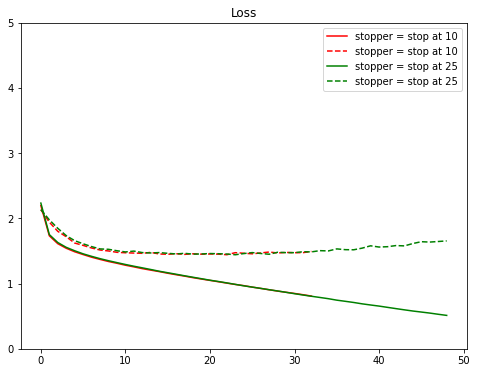

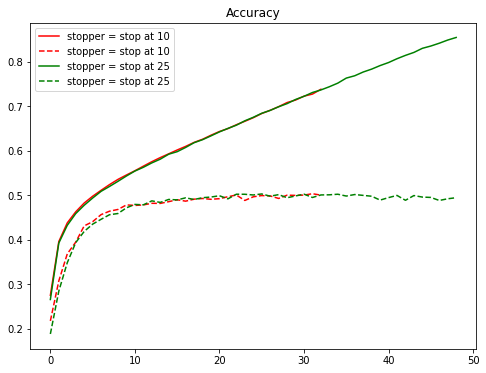

In [19]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()